<a href="https://colab.research.google.com/github/sanchiitvijay/test-extraction/blob/main/text_extraction_using_keras_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
! cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download -d robikscube/textocr-text-extraction-from-images-dataset

100% 6.72G/6.73G [01:08<00:00, 129MB/s]
100% 6.73G/6.73G [01:08<00:00, 105MB/s]


In [11]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

In [60]:
!unzip textocr-text-extraction-from-images-dataset.zip --quiet

Archive:  textocr-text-extraction-from-images-dataset.zip
caution: filename not matched:  --quiet


In [61]:
annot = pd.read_parquet('/content/annot.parquet')
imgs = pd.read_parquet('/content/img.parquet')
img_fns = glob('/content/train_val_images/train_images/*')

In [62]:
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.imshow(plt.imread(img_fns[1]))
# ax.axis('off')
# plt.show()

In [63]:
image_id = img_fns[0].split('/')[-1].split('.')[0]
annot.query('image_id == @image_id')

,id,image_id,bbox,utf8_string,points,area
560423,345303c74bcf2e07_1,345303c74bcf2e07,"[776.03, 238.5, 6.55, 12.76]",.,"[776.03, 250.91, 776.38, 238.5, 782.58, 238.68...",83.58
560424,345303c74bcf2e07_2,345303c74bcf2e07,"[775.67, 218.31, 6.38, 17.36]",.,"[776.56, 235.67, 775.67, 218.48, 781.52, 218.3...",110.76
560425,345303c74bcf2e07_3,345303c74bcf2e07,"[774.97, 206.79, 6.73, 12.05]",.,"[775.5, 218.13, 774.97, 206.79, 780.99, 207.32...",81.10
560426,345303c74bcf2e07_4,345303c74bcf2e07,"[774.61, 202.18, 6.73, 4.26]",.,"[774.61, 206.44, 774.61, 202.18, 781.34, 202.3...",28.67
560427,345303c74bcf2e07_5,345303c74bcf2e07,"[785.75, 238.23, 4.56, 13.42]",.,"[786.02, 251.65, 785.75, 238.23, 790.18, 238.2...",61.20
560428,345303c74bcf2e07_6,345303c74bcf2e07,"[796.22, 234.06, 4.7, 17.46]",.,"[796.22, 251.52, 796.22, 234.2, 800.92, 234.06...",82.06
560429,345303c74bcf2e07_7,345303c74bcf2e07,"[795.55, 217.95, 5.64, 16.11]",.,"[796.49, 234.06, 795.55, 217.95, 800.52, 217.9...",90.86
560430,345303c74bcf2e07_8,345303c74bcf2e07,"[794.34, 206.4, 5.24, 11.15]",.,"[794.47, 217.41, 794.34, 206.54, 799.58, 206.4...",58.43
560431,345303c74bcf2e07_9,345303c74bcf2e07,"[790.98, 240.11, 4.57, 11.81]",.,"[790.98, 251.92, 790.98, 240.11, 795.55, 240.1...",53.97
560432,345303c74bcf2e07_10,345303c74bcf2e07,"[790.31, 224.53, 5.1, 14.9]",.,"[791.12, 239.3, 790.31, 224.66, 794.88, 224.53...",75.99


In [64]:
# fig, axs = plt.subplots(5, 5, figsize=(20, 20))
# axs = axs.flatten()
# for i in range(25):
#     axs[i].imshow(plt.imread(img_fns[i]))
#     axs[i].axis('off')
#     image_id = img_fns[i].split('/')[-1].rstrip('.jpg')
#     n_annot = len(annot.query('image_id == @image_id'))
#     axs[i].set_title(f'{image_id} - {n_annot}')
# plt.show()

In [65]:
pip install keras-ocr -q

In [66]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
# main

In [118]:
results = pipeline.recognize([img_fns[21]])

1/1 [==============================] - 4s 4s/step


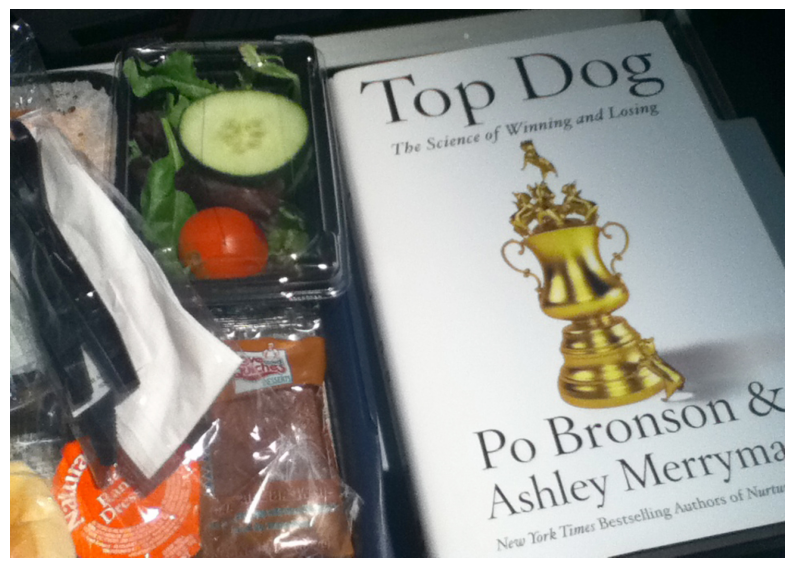

In [119]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(img_fns[21]))
ax.axis('off')
plt.show()

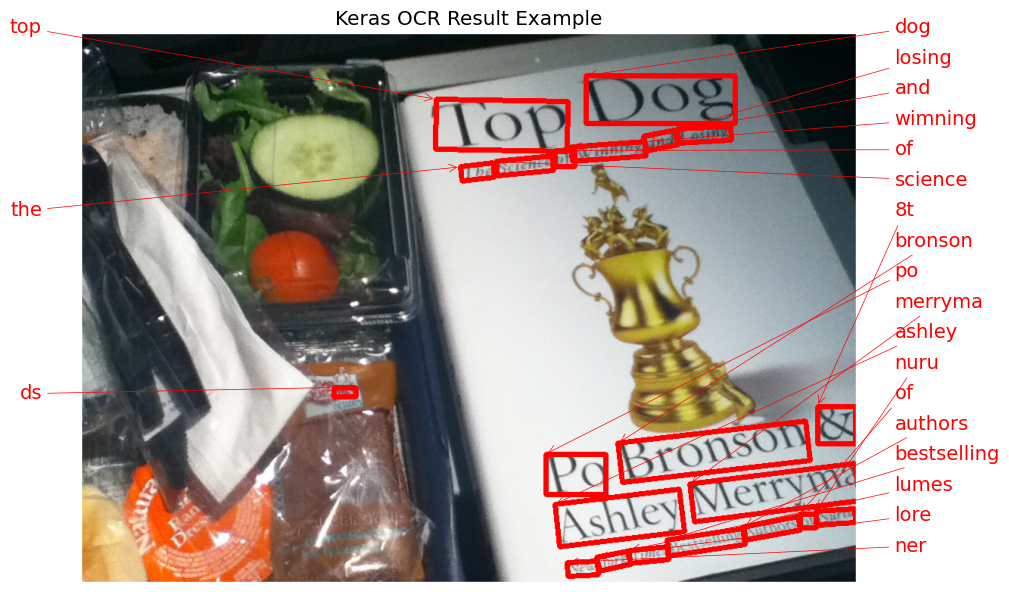

In [122]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(plt.imread(img_fns[21]), results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

In [121]:
pd.DataFrame(results[0], columns=['text', 'bbox'])

,text,bbox
0,dog,"[[667.0, 56.0], [864.0, 56.0], [864.0, 119.0],..."
1,top,"[[469.35568, 87.03676], [643.9407, 90.49388], ..."
2,losing,"[[788.1108, 126.993835], [858.72614, 123.07077..."
3,and,"[[743.475, 136.8702], [784.6448, 128.95293], [..."
4,wimning,"[[647.81647, 150.37752], [744.69977, 143.03789..."
5,of,"[[626.0, 155.0], [652.0, 155.0], [652.0, 176.0..."
6,science,"[[548.4315, 169.53033], [622.66296, 162.46066]..."
7,the,"[[501.44623, 176.56921], [544.277, 171.21536],..."
8,ds,"[[334.0, 468.0], [363.0, 468.0], [363.0, 480.0..."
9,8t,"[[973.0, 493.0], [1023.0, 493.0], [1023.0, 542..."
